<a href="https://colab.research.google.com/github/CurtCalledBurt/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [0]:
bills = {
    'republican': 'party',
    'n': 'infants',
    'y': 'cost-sharing',
    'n.1': 'budget',
    'y.1': 'fee-freeze',
    'y.2': 'el-salvador',
    'y.3': 'religion',
    'n.2': 'test-ban',
    'n.3': 'nicaraguan-contras', 
    'n.4': 'mx-missile', 
    'y.4': 'immigration', 
    '?': 'corporation-cutback', 
    'y.5': 'education', 
    'y.6': 'right-to-sue', 
    'y.7': 'crime', 
    'n.5': 'duty-free-exports', 
    'y.8': 'export-administration'
}

In [7]:
politics = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
politics = politics.rename(columns = bills)
politics = politics.replace({'y': 1, 'n': -1, '?': 0})
politics.head()

,party,infants,cost-sharing,budget,fee-freeze,el-salvador,religion,test-ban,nicaraguan-contras,mx-missile,immigration,corporation-cutback,education,right-to-sue,crime,duty-free-exports,export-administration
0,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
1,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
2,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
3,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
4,democrat,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1


In [9]:
dem = politics[politics['party'] == 'democrat']
rep = politics[politics['party'] == 'republican']
print(dem.head(), '/n', rep.head())

      party  infants  ...  duty-free-exports  export-administration
1  democrat        0  ...                 -1                     -1
2  democrat       -1  ...                 -1                      1
3  democrat        1  ...                  1                      1
4  democrat       -1  ...                  1                      1
5  democrat       -1  ...                  1                      1

[5 rows x 17 columns] /n          party  infants  ...  duty-free-exports  export-administration
0   republican       -1  ...                 -1                      0
6   republican       -1  ...                  0                      1
7   republican       -1  ...                 -1                      1
9   republican       -1  ...                 -1                     -1
10  republican       -1  ...                  0                      0

[5 rows x 17 columns]


In [56]:
#note to Curtis: the first number labeld 'statistic' is NOT the t-value... even though
#the internet says it is... do more reading.
stats.ttest_1samp(rep['religion'], 0)

Ttest_1sampResult(statistic=16.555182910517555, pvalue=5.608406584321421e-37)

In [0]:
#we are postulating that republicans are more in favor of religion in schools than would be
#determined by random chance, so our null hypothesis is 0. If republicans were randomly
#for or against the issue, they would be evenly split, and the 1's and -1's would cancel, 
#giving us a total of 0.

n = len(rep)
conf = .95

t_stat = stats.t.ppf((1 + conf) / 2.0, n - 1)
dof = len(rep) - 1

stdev = np.std(rep['religion'], ddof = 1)
stderr = stdev/np.sqrt(n)

In [115]:
error = stderr * stats.t.ppf((1 + conf) / 2.0, dof)
error

0.09355062491233863

In [121]:
lower_bound = rep['religion'].mean() - error
lower_bound

0.6908805128122122

In [122]:
upper_bound = rep['religion'].mean() + error
upper_bound

0.8779817626368895

In [0]:
#we clean this up and make a function to call again and again:

def conf_interval(data, conf = .95): #set default to 95%
  n = len(data)

  t_stat = stats.t.ppf((1 + conf) / 2.0, n - 1)
  dof = len(data) - 1

  stdev = np.std(data, ddof = 1)
  stderr = stdev/np.sqrt(n)
  
  error = stderr * stats.t.ppf((1 + conf) / 2.0, dof)
  
  lower_bound = data.mean() - error
  upper_bound = data.mean() + error
  mean = data.mean()
  
  return (mean, lower_bound, upper_bound)

In [132]:
conf_interval(rep['religion'])

(0.7844311377245509, 0.6908805128122122, 0.8779817626368895)

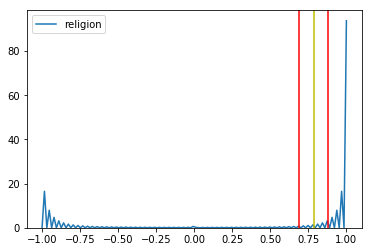

In [144]:
#graph this ^^^
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(rep['religion'])

conf_int = conf_interval(rep['religion'])
plt.axvline(x=conf_int[0], color='y')
plt.axvline(x=conf_int[1], color='r')
plt.axvline(x=conf_int[2], color='r')
plt.show;

This confidence interval is quite small, very tight. The associated p-value was really small. This allows us to comfortably reject the null-hypothesis that republicans are indifferent towards this bill; they seem very in favor of it.

In [170]:
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header = None)
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [171]:
col_name = {0: 'buying_price', 
            1: 'maint_price', 
            2: 'number_of_doors', 
            3: 'max_passengers', 
            4: 'trunk_size', 
            5: 'safety',
            6: 'accessorized'
           }
cars = cars.rename(columns = col_name)
cars.head()

,buying_price,maint_price,number_of_doors,max_passengers,trunk_size,safety,accessorized
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [180]:
cars['buying_price'] = cars['buying_price'].replace({'vhigh': 2, 
                                                      'high': 1, 
                                                      'med': -1,
                                                      'low': -2
                                                     })
cars['maint_price'] = cars['maint_price'].replace({'vhigh': 2, 
                                                   'high': 1, 
                                                   'med': -1,
                                                   'low': -2
                                                  })

TypeError: ignored

In [181]:
cars.head()

,buying_price,maint_price,number_of_doors,max_passengers,trunk_size,safety,accessorized
0,2,2,2,2,small,low,unacc
1,2,2,2,2,small,med,unacc
2,2,2,2,2,small,high,unacc
3,2,2,2,2,med,low,unacc
4,2,2,2,2,med,med,unacc


In [182]:
cars['buying_price'].value_counts()

-2    432
 2    432
 1    432
-1    432
Name: buying_price, dtype: int64

In [183]:
cars['maint_price'].value_counts()

-2    432
 2    432
 1    432
-1    432
Name: maint_price, dtype: int64

In [0]:
#... well that certainly looks suspicious. I get the feeling this dataset might be 
#bit more cooked than I thought. 

In [185]:
tab = pd.crosstab(cars['buying_price'], cars['maint_price'], margins = True)
tab

maint_price,-2,-1,1,2,All
buying_price,,,,,
-2,108,108,108,108,432
-1,108,108,108,108,432
1,108,108,108,108,432
2,108,108,108,108,432
All,432,432,432,432,1728


In [0]:
#Yep. Definitely cooked. 
#I even found where they that they cooked it; 
#"Number of Instances: 1728 (instances completely cover the attribute space)"

#Well... let's just do the best we can then.

In [189]:
low_buy = tab.iloc[0][0:4].values
low_buy

array([108, 108, 108, 108])

In [190]:
med_buy = tab.iloc[1][0:4].values
med_buy

array([108, 108, 108, 108])

In [193]:
high_buy = tab.iloc[2][0:4].values
high_buy

array([108, 108, 108, 108])

In [195]:
very_high_buy = tab.iloc[3][0:4].values
very_high_buy

array([108, 108, 108, 108])

In [0]:
#technically speaking I could have just used the same code four times
#and filed it under different names but... I guess it's better to
#be more generalizable then that.

In [0]:
#plotting for fun
import matplotlib.pyplot as plt
import seaborn as sns

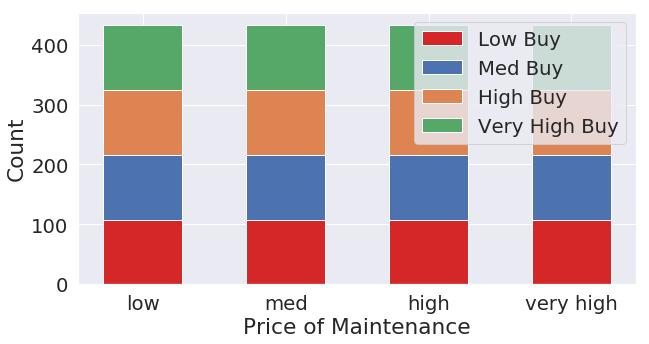

In [201]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)

categories = ["low","med","high","very high"]

p1 = plt.bar(categories, low_buy, 0.55, color='#d62728')
p2 = plt.bar(categories, med_buy, 0.55, bottom=low_buy)
p3 = plt.bar(categories, high_buy, 0.55, bottom=low_buy + med_buy)
p4 = plt.bar(categories, very_high_buy, 0.55, bottom=low_buy + med_buy + high_buy)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Low Buy', 'Med Buy', 'High Buy', 'Very High Buy'))
plt.xlabel('Price of Maintenance')
plt.ylabel('Count')
plt.show()

In [205]:
row_sum = tab.iloc[0:4, 4].values
row_sum

array([432, 432, 432, 432])

In [207]:
col_sum = tab.iloc[4, 0:4].values
col_sum

array([432, 432, 432, 432])

In [211]:
total = tab.loc['All', 'All']
total

1728

In [216]:
exp = []
for row in row_sum:
  exp_row = []
  for col in col_sum:
    exp_val = col * row / total
    exp_row.append(exp_val)
  exp.append(exp_row)
exp

#make the list into an array so we can do math on it
exp = np.array(exp)
exp

array([[108., 108., 108., 108.],
       [108., 108., 108., 108.],
       [108., 108., 108., 108.],
       [108., 108., 108., 108.]])

In [218]:
obs = pd.crosstab(cars['buying_price'], cars['maint_price']).values
obs

array([[108, 108, 108, 108],
       [108, 108, 108, 108],
       [108, 108, 108, 108],
       [108, 108, 108, 108]])

In [0]:
#pretty obvious how this is about to go down, but here we go

In [220]:
chi_sqrd = ((obs - exp)**2 / exp).sum()
chi_sqrd

0.0

In [222]:
dof = (len(row_sum)-1)*(len(col_sum)-1)
dof

9

In [224]:
chi_sqrd, p_val, dof, exp = stats.chi2_contingency(obs)
print(chi_sqrd, '\n',
      p_val, '\n', 
      dof, '\n', 
      exp)

0.0 
 1.0 
 9 
 [[108. 108. 108. 108.]
 [108. 108. 108. 108.]
 [108. 108. 108. 108.]
 [108. 108. 108. 108.]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)